In [73]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [177]:
os.chdir(r'C:\Users\ganga\OneDrive\Desktop\Machine learning\Verzeo major project')
print(os.listdir())

['Corona_NLP (2).csv', 'Machine Learning with Python.pdf', 'verzeo project.py']


In [178]:
data = pd.read_csv('Corona_NLP (2).csv', encoding='latin1')
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [179]:
data.shape

(41157, 6)

In [180]:
data.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [181]:
data.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [182]:
data['Sentiment'] = data['Sentiment'].replace(to_replace=['Extremely Negative', 'Extremely Positive'], value=['Negative', 'Positive'])

In [183]:
data.Sentiment.value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

In [184]:
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [186]:
data['TweetAt'] = pd.to_datetime(data['TweetAt'])

In [187]:
data.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [188]:
data['day'] = pd.DatetimeIndex(data['TweetAt']).day
data['month'] = pd.DatetimeIndex(data['TweetAt']).month
data['year'] = pd.DatetimeIndex(data['TweetAt']).year

In [189]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day,month,year
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,16,3,2020
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,16,3,2020
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,16,3,2020
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,16,3,2020
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,16,3,2020


In [190]:
data.Location.nunique()

12220

In [191]:
month_based = data[data['month']==3]

In [192]:
month_based.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day,month,year
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,16,3,2020
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,16,3,2020
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,16,3,2020
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,16,3,2020
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,16,3,2020


In [193]:
month_based.Sentiment.value_counts()

Positive    11353
Negative    10216
Neutral      4740
Name: Sentiment, dtype: int64

In [194]:
data.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
day                 0
month               0
year                0
dtype: int64

In [195]:
data['Location'].mode()

0    London
dtype: object

In [196]:
data['Location']=data['Location'].fillna(data['Location'].mode()[0])

In [197]:
data.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
day              0
month            0
year             0
dtype: int64

In [198]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,day,month,year
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,16,3,2020
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,16,3,2020
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,16,3,2020
3,3802,48754,London,2020-03-16,My food stock is not the only one which is emp...,Positive,16,3,2020
4,3803,48755,London,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,16,3,2020


In [199]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [200]:
lemmatizer = WordNetLemmatizer()

In [201]:
cleaned_data = []
for i in range(0, len(data)):
    words = re.sub('[^a-zA-Z]', ' ', data['OriginalTweet'][i])
    words = words.lower()
    words = words.split()
    
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    words = ' '.join(words)
    cleaned_data.append(words)

In [202]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [203]:
cv = CountVectorizer(max_features=100, ngram_range=(1,2))

In [204]:
X = cv.fit_transform(cleaned_data).toarray()

In [103]:
pd.DataFrame(X, columns=cv.get_feature_names())

,amazon,amid,amp,business,buy,buying,chain,co,consumer,coronavirus,...,toilet,toilet paper,uk,virus,way,week,work,worker,world,would
0,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,0,0,0,0,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1218,0,0,1,0,0,0,0,2,0,1,...,0,0,0,0,0,1,0,0,0,0
1219,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [110]:
data.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'day', 'month', 'year'],
      dtype='object')

In [111]:
sample = data.loc[:, ['UserName', 'ScreenName', 'day', 'month', 'year']]

In [128]:
X = pd.DataFrame(X, columns=tf.get_feature_names())

In [129]:
X = pd.concat([sample, X], axis=1)

In [130]:
X.head()

,UserName,ScreenName,day,month,year,ab,abc,abcnews,ability,able,...,yo,york,young,youtube,yr,zealand,zero,zombie,zone,zoom
0,3799,48751,16,3,2020,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3800,48752,16,3,2020,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3801,48753,16,3,2020,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3802,48754,16,3,2020,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3803,48755,16,3,2020,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
y = data['Sentiment']

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [134]:
naive = MultinomialNB()

In [135]:
naive.fit(X_train, y_train)
pred = naive.predict(X_test)

In [136]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [137]:
accuracy_score(y_test, pred)

0.31446031512295686

In [138]:
cm = confusion_matrix(y_test, pred)
cm

array([[2709, 2215,  129],
       [1154, 1313,   51],
       [2878, 2884,  249]], dtype=int64)

<AxesSubplot:>

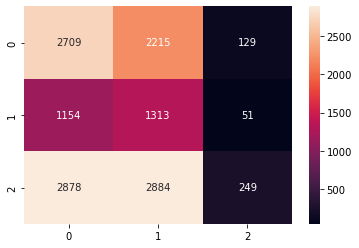

In [139]:
sns.heatmap(cm, annot=True, fmt='g')

In [214]:
tf = TfidfVectorizer(max_features=100, ngram_range=(1, 3))
X = tf.fit_transform(cleaned_data).toarray()

In [206]:
X = pd.DataFrame(X, columns=tf.get_feature_names())

C:\Users\ganga\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [207]:
X = pd.concat([sample, X], axis=1)

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [209]:
naive.fit(X_train, y_train)
pred = naive.predict(X_test)

In [210]:
accuracy_score(y_test, pred)

0.31596209912536444

In [211]:
cm = confusion_matrix(y_test, pred)
cm

array([[1623, 1357,   82],
       [ 706,  813,   34],
       [1755, 1697,  165]], dtype=int64)

<AxesSubplot:>

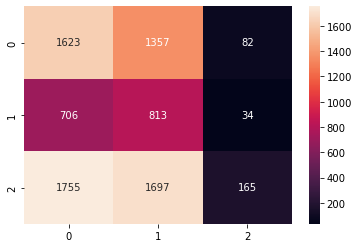

In [212]:
sns.heatmap(cm, annot=True, fmt='g')

In [152]:
naive.coef_

C:\Users\ganga\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([[ -9.47680474,  -8.83084753,  -9.1826927 , ...,  -9.13106425,
         -9.53373913,  -9.67666516],
       [ -9.22319242,  -8.95054358,  -9.03531944, ...,  -8.93944742,
         -9.24800432,  -8.61778697],
       [-10.17732689,  -9.28163934,  -9.95244489, ...,  -9.62436242,
         -9.68466627,  -9.63894252]])

In [72]:
help(naive.coef_)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

C:\Users\ganga\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [160]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    Negative       0.71      0.67      0.69      3062
     Neutral       0.49      0.66      0.56      1553
    Positive       0.75      0.67      0.71      3617

    accuracy                           0.67      8232
   macro avg       0.65      0.67      0.65      8232
weighted avg       0.69      0.67      0.67      8232



In [162]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train, y_train = ros.fit_resample(X_train, y_train)

In [167]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    Negative       0.70      0.67      0.68      3062
     Neutral       0.49      0.67      0.56      1553
    Positive       0.76      0.67      0.71      3617

    accuracy                           0.67      8232
   macro avg       0.65      0.67      0.65      8232
weighted avg       0.68      0.67      0.67      8232

